<br><br>

## Data Cleansing with Pandas

<br><br>


## Overview

#### Data Cleansing (sometimes called Data Cleaning) is the process of correcting or removing irregular values from a dataset

 - Tasks involved:
- Exploration (Detection)
        - Examine the dataset for completeness (e.g., how many missing values)
        - Verify constraints (regular expressions, type, ranges, cross-field constraints)
- Fix Anomalies (remove and/or replace)
        - Remove observations or features containing missing values
        - Impute values using different strategies
        - Remove duplicates
        - Ensure text formatting and units are consistent
        - Detect and handle outliers
- Verify Changes
 

In addition to the above, if you are data modeling, you will likely need to perform a few additional tasks:
 - Encode data values
 - Convert continuous values to categorical
 - Cut and bin continuous values
 - Perform type conversions
 - Normalize / Standarize column values


In [80]:
from datetime import date
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

<br><br>
The Titanic dataset is a good place to start because it can illustrate many of the concepts discussed above. So, we'll use this dataset for examining this topic.
<br><br>

In [81]:
titanic = sns.load_dataset('titanic')

<br><br>
## Task 1: Data Exploration
<br>

There are 3 steps you should *always* perform after acquiring your dataset within Pandas: 
- shape
- head()
- info()

Do these **often**, even after initial data acquisition.

In [82]:
titanic.shape

(891, 15)

In [83]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [84]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<br><br>
dataframe.info() (above) can identify many things including rows that don't have complete values.
<br>
You can also use the following statement to help detect which columns don't have values (or have NaN values)...

In [6]:
pd.isnull(titanic).sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Two of the columns above have missing values (embarked and embark_town).  You can look at these rows with the following statement:

In [7]:
titanic[titanic.embark_town.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


<br><br>
The following shows rows where NaNs appear in *any* column...

In [8]:
titanic[titanic.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


<br><br>
You can represent NaNs using a heatmap from the data visualization library, called Seaborn.
We could do this on multiple columns, but the others are not yet encoded, so we'll just use the 'age' column:

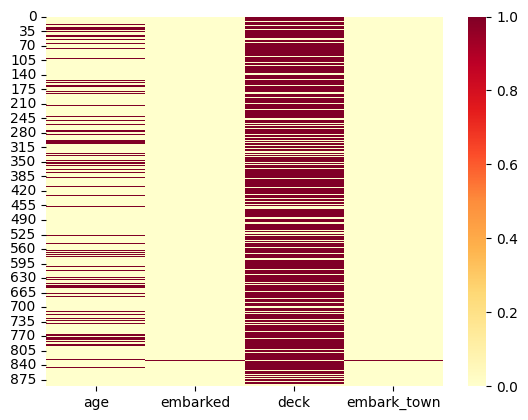

In [9]:
selected_columns = ['age', 'embarked', 'deck', 'embark_town']
sns.heatmap(titanic[selected_columns].isnull(), cmap='YlOrRd');  
# Red represents a NaN

<br><br>
## Pandas Note: *df.isna()*   vs.   *ds.isnull()*
<br>
In Pandas, these methods are identical.
<br><br>
Use these methods when necessary:<br>
    Numpy...  <code>np.isnan(arr)</code><br>
    Pandas...  <code>df.isnull()</code> or <code>df.isna()</code>       
    
There are 2 ways in Pandas to mimic how it is done in R.

<br><br>
We can also view all the values in these columns to get a better picture of what they contain...

In [10]:
titanic.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [11]:
titanic.sibsp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<br><br>
(above) The unique() function shows all the values that can occur in a specified column.  Including NaNs.
<br><br>

<br><br>
Use value_counts() to tell us how many can be found of a certain value in this column.  NaNs are not shown by default.  Also, this only works on a Series (single-column)

In [12]:
titanic.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

If you want to actually see the NaNs, use dropna=False

In [13]:
titanic.embark_town.value_counts(dropna=False)

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64

In [14]:
titanic.sibsp.value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<br><br>
Validating Constraints

In [15]:
titanic.pclass.isin([1, 2, 3]).sum()

891

<br><br>
## Task 2: Fixing Anomalies
<br>

#### Removing Observations with Missing Values


It is possible to remove *all* observations containing NaNs in any column using:
<code>titanic.dropna(inplace=True)</code>
<br>
This might be too big of an operation and may result in an unnecessary loss of data.  We'll try to handle this in a smaller, more fine-grained way, if possible...
<br><br>


Time to handle the data in the embark_town column...we'll remove the two records where NaNs occur here...
<br><br>

In [16]:
titanic.dropna(subset=['embark_town'], inplace=True) 

<br><br>
Once again, a check of the data...

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  deck         201 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        889 non-null    object  
 14  alone        889 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 87.3+ KB


<br><br>
The above shows 889 samples are non-null in the embark_town column now.  We can also check for NaNs directly:

In [18]:
pd.isnull(titanic).sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

<br><br>
#### Imputing Values
We'll treat the age column next by imputing values...

In [19]:
age_mean = titanic.age.mean(skipna=True)       # skipna = True means don't count NaN columns 
age_mean

29.64209269662921

In [20]:
age_median = titanic.age.median()
age_median

28.0

<br><br>
To impute values, you first decide on a strategy (mean, median, some other value).  Then use fillna():

In [24]:
titanic.age.fillna(age_median, inplace=True)

C:\Users\gance\AppData\Local\Temp\ipykernel_9128\707106363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.age.fillna(age_median, inplace=True)


In [25]:
pd.isnull(titanic).sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

<br><br>
**Scikit-learn**, a Python-based data modeling tool, provides a class that can do this also, called *SimpleImputer*.  However, this solution is not quite as easy to read...

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
column_to_impute = titanic[['age']].to_numpy()
imputed_column = imputer.fit_transform(column_to_impute)
titanic['age'] = pd.DataFrame(imputed_column)
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              2
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

<br><br>
#### Removing Columns
The deck has many missing values--perhaps too many to impute anything meaningful.  So, we'll simply drop this column:

In [27]:
titanic.drop(labels=['deck'], inplace=True, axis=1)

In [28]:
pd.isnull(titanic).sum()

survived       0
pclass         0
sex            0
age            2
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<br><br>
#### Managing Duplicate Observations
Our Titanic dataset doesn't incorporate duplicate observations very well, so we'll use another sample dataset for illustration purposes.  Consider the following dataset:

In [29]:
ice_cream = pd.DataFrame({
    'flavor': ['Vanilla', 'Chocolate', 'Strawberry', 'Vanilla', 'Vanilla', 'Chocolate', 'Vanilla'],
    'topping': ['None', 'Sprinkles', 'Hot Fudge', 'Sprinkles', 'Sprinkles', 'Caramel', 'None'],
    'cost': [4, 4.75, 4.75, 4.75, 4.75, 4.75, 4]
})
ice_cream

,flavor,topping,cost
0,Vanilla,None,4.00
1,Chocolate,Sprinkles,4.75
2,Strawberry,Hot Fudge,4.75
3,Vanilla,Sprinkles,4.75
4,Vanilla,Sprinkles,4.75
5,Chocolate,Caramel,4.75
6,Vanilla,None,4.00


<br><br>
We can use **drop_duplicates()** to remove any observations that have identical values in all of the corresponding columns...

In [30]:
ice_cream.drop_duplicates()

,flavor,topping,cost
0,Vanilla,None,4.00
1,Chocolate,Sprinkles,4.75
2,Strawberry,Hot Fudge,4.75
3,Vanilla,Sprinkles,4.75
5,Chocolate,Caramel,4.75


<br><br>
If we only wish to consider duplication of data in a specified column or columns, use **subset=**.

In [31]:
ice_cream.drop_duplicates(subset=['flavor'])

,flavor,topping,cost
0,Vanilla,None,4.00
1,Chocolate,Sprinkles,4.75
2,Strawberry,Hot Fudge,4.75


<br><br>
#### Text Formatting and Pandas Accessors
Pandas provides three accessors (str, dt, cat) that allow column operations element-by-element

In [32]:
personnel = pd.DataFrame([('Edward', 'Janitor', date(2004, 3, 3)),
                   ('Tracy', 'Teacher', date(2017, 7, 17)),
                   ('Amanda', 'Bus Driver', date(2011, 5, 21))],
                  columns=['Name', 'Position', 'Hire_date'])
personnel

,Name,Position,Hire_date
0,Edward,Janitor,2004-03-03
1,Tracy,Teacher,2017-07-17
2,Amanda,Bus Driver,2011-05-21


In [33]:
personnel.Name = personnel.Name.str.upper()
personnel

,Name,Position,Hire_date
0,EDWARD,Janitor,2004-03-03
1,TRACY,Teacher,2017-07-17
2,AMANDA,Bus Driver,2011-05-21


In [34]:
personnel.Position = personnel.Position.astype('category')
personnel['Position'] = personnel.Position.cat.codes
personnel

,Name,Position,Hire_date
0,EDWARD,1,2004-03-03
1,TRACY,2,2017-07-17
2,AMANDA,0,2011-05-21


In [35]:
personnel['Hire_date'] = pd.to_datetime(personnel['Hire_date'])
personnel['Month_hired'] = personnel['Hire_date'].dt.month_name()
personnel

,Name,Position,Hire_date,Month_hired
0,EDWARD,1,2004-03-03,March
1,TRACY,2,2017-07-17,July
2,AMANDA,0,2011-05-21,May


<br><br>
## Encoding Values
Now for some data encoding...
<br><br>
First, let's look at the data types for the columns...

In [36]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          887 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


<br><br>
Columns that are object types are not useful when creating models.  They need to be converted or encoded.
The easiest way to encode values is through **simple value-replacement**.  

In [38]:
titanic.embarked.value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [39]:
titanic.who.value_counts()

who
man      537
woman    269
child     83
Name: count, dtype: int64

In [40]:
titanic.replace({'embarked': {'C': 0, 'Q': 1, 'S': 2},
                 'who': {'man': 0, 'woman': 1, 'child': 2}}, inplace=True)

C:\Users\gance\AppData\Local\Temp\ipykernel_9128\451735203.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'embarked': {'C': 0, 'Q': 1, 'S': 2},


In [41]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,2,Third,0,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,0,First,1,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,2,Third,1,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,2,First,1,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,2,Third,0,True,Southampton,no,True


In [42]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          887 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    int64   
 8   class        889 non-null    category
 9   who          889 non-null    int64   
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(6), object(3)
memory usage: 86.1+ KB


<br><br> 
Now the who and embarked columns are int dtypes.
<br><br>
For the embark_town column, **we'll use categorical encoding**.  First it needs to be converted to a category type:

In [43]:
titanic.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [44]:
titanic.embark_town = titanic.embark_town.astype('category')

In [45]:
titanic.embark_town = titanic.embark_town.cat.codes

In [46]:
titanic.embark_town.value_counts()

embark_town
2    644
0    168
1     77
Name: count, dtype: int64

In [47]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,2,Third,0,True,2,no,False
1,1,1,female,38.0,1,0,71.2833,0,First,1,False,0,yes,False
2,1,3,female,26.0,0,0,7.9250,2,Third,1,False,2,yes,True
3,1,1,female,35.0,1,0,53.1000,2,First,1,False,2,yes,False
4,0,3,male,35.0,0,0,8.0500,2,Third,0,True,2,no,True


In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          887 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    int64   
 8   class        889 non-null    category
 9   who          889 non-null    int64   
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    int8    
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(6), int8(1), object(2)
memory usage: 80.0+ KB


<br><br>
The class column is a category type, but it contains strings, which can cause problems.  Let's **one-hot encode** this column using Pandas **get_dummies(df, columns)**:

In [49]:
titanic = pd.get_dummies(titanic, columns=['class'])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive,alone,class_First,class_Second,class_Third
0,0,3,male,22.0,1,0,7.2500,2,0,True,2,no,False,False,False,True
1,1,1,female,38.0,1,0,71.2833,0,1,False,0,yes,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,2,1,False,2,yes,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,2,1,False,2,yes,False,True,False,False
4,0,3,male,35.0,0,0,8.0500,2,0,True,2,no,True,False,False,True


<br><br>
The alive column represents similar information to the survived label and the along column represents similar information to the sibsp.  The adult_male and sex columns are also covered by the "who" column.  So, **we'll drop these four columns**:

In [50]:
titanic.drop(labels=['alive', 'alone', 'adult_male', 'sex'], inplace=True, axis=1)
titanic.head()

,survived,pclass,age,sibsp,parch,fare,embarked,who,embark_town,class_First,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,2,0,2,False,False,True
1,1,1,38.0,1,0,71.2833,0,1,0,True,False,False
2,1,3,26.0,0,0,7.9250,2,1,2,False,False,True
3,1,1,35.0,1,0,53.1000,2,1,2,True,False,False
4,0,3,35.0,0,0,8.0500,2,0,2,False,False,True


<br><br>
Even though we did this using Pandas get_dummies() already, as a demonstration, we'll convert the **pclass** column into a one-hot encoded solution **using Scikit-learn's LabelBinarizer**:

In [51]:
from sklearn.preprocessing import LabelBinarizer

In [52]:
lb = LabelBinarizer()
pclass_encoded = pd.DataFrame(lb.fit_transform(titanic.pclass), columns=['p1', 'p2', 'p3'])

In [53]:
titanic = pd.concat([titanic, pclass_encoded], axis=1, join='inner')
titanic.drop('pclass', axis=1, inplace=True)
titanic.head()

,survived,age,sibsp,parch,fare,embarked,who,embark_town,class_First,class_Second,class_Third,p1,p2,p3
0,0,22.0,1,0,7.2500,2,0,2,False,False,True,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,True,False,False,1,0,0
2,1,26.0,0,0,7.9250,2,1,2,False,False,True,0,0,1
3,1,35.0,1,0,53.1000,2,1,2,True,False,False,1,0,0
4,0,35.0,0,0,8.0500,2,0,2,False,False,True,0,0,1


<br><br>
#### Normalization and Standardization
For some algorithms, large values can affect results.  Often using normalization and scaling can help with results.
<br>
We'll use a StandardScaler to change those values.  Examples of StandardScaler and MinMaxScaler...

<br><br>

**Z-score (Standardization) Scaling** - transforms features so that they have a mean = 0, and a std dev. of 1.<br>
**Min-Max Scaling (Normalization)** -  Scales values down to fit into a specified range (usually 0 to 1).
<br>
To help understand each, take the following example...

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [55]:
data = [0, 1, 2]
data = pd.DataFrame(data)
X = data[0]
data

,0
0,0
1,1
2,2


In [56]:
data_scaled = StandardScaler().fit_transform(data)
data_scaled = pd.DataFrame(data_scaled)
data_scaled

,0
0,-1.224745
1,0.000000
2,1.224745


In [57]:
data_minmax = MinMaxScaler().fit_transform(data)
data_minmax = pd.DataFrame(data_minmax)
data_minmax

,0
0,0.0
1,0.5
2,1.0


<br><br>
We'll use Standardization for the fare column...

In [58]:
titanic.fare.to_numpy().reshape(-1, 1)[:5]      # a sample of the first 5 records

array([[ 7.25  ],
       [71.2833],
       [ 7.925 ],
       [53.1   ],
       [ 8.05  ]])

In [59]:
titanic.fare = StandardScaler().fit_transform(titanic.fare.to_numpy().reshape(-1, 1))
titanic.head()

,survived,age,sibsp,parch,fare,embarked,who,embark_town,class_First,class_Second,class_Third,p1,p2,p3
0,0,22.0,1,0,-0.500344,2,0,2,False,False,True,0,0,1
1,1,38.0,1,0,0.787566,0,1,0,True,False,False,1,0,0
2,1,26.0,0,0,-0.486768,2,1,2,False,False,True,0,0,1
3,1,35.0,1,0,0.421843,2,1,2,True,False,False,1,0,0
4,0,35.0,0,0,-0.484254,2,0,2,False,False,True,0,0,1


<br><br>
## Outlier Detection Analysis and Removal
<br><br>
Lastly, we'll perform an outlier detection analysis...

C:\temp\python\student_files\venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


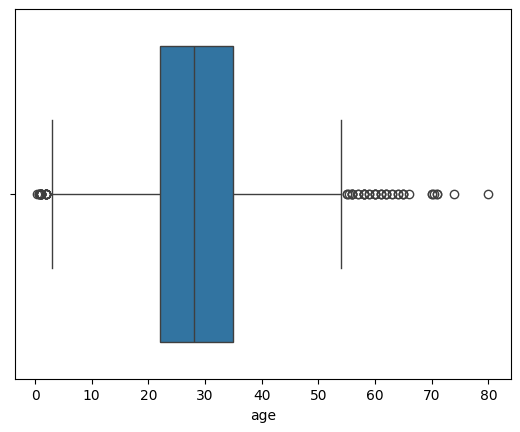

In [60]:
sns.boxplot(data=titanic, x=titanic.age);

C:\temp\python\student_files\venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


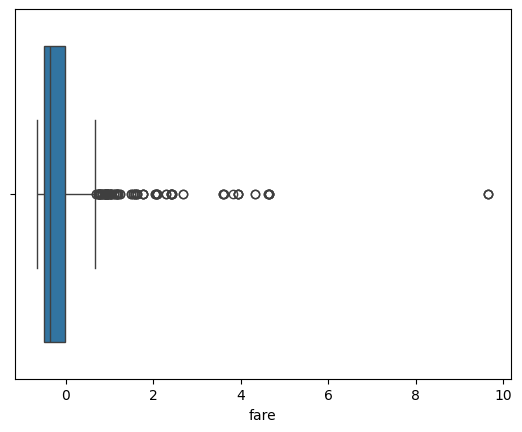

In [61]:
sns.boxplot(data=titanic, x=titanic.fare);

In [62]:
def remove_outliers_by_column(df, column, whisker=1.5):
    Q1 = df[column].quantile(0.25)  # calculate Q1
    Q3 = df[column].quantile(0.75)  # calculate Q3
    IQR = Q3 - Q1
    width = whisker * IQR
    lower_bound = Q1 - width
    upper_bound = Q3 + width
    filter = (df[column] >= lower_bound) &  (df[column] <= upper_bound)
    return df.loc[filter]

In [63]:
titanic.shape

(887, 14)

In [64]:
outliers_removed_fare = remove_outliers_by_column(titanic, 'fare')
outliers_removed_fare.shape

(773, 14)

In [65]:
outliers_removed_age = remove_outliers_by_column(outliers_removed_fare, 'age')
outliers_removed_age.shape

(713, 14)

In [66]:
titanic = outliers_removed_age

In [67]:
titanic.head()

,survived,age,sibsp,parch,fare,embarked,who,embark_town,class_First,class_Second,class_Third,p1,p2,p3
0,0,22.0,1,0,-0.500344,2,0,2,False,False,True,0,0,1
2,1,26.0,0,0,-0.486768,2,1,2,False,False,True,0,0,1
3,1,35.0,1,0,0.421843,2,1,2,True,False,False,1,0,0
4,0,35.0,0,0,-0.484254,2,0,2,False,False,True,0,0,1
5,0,28.0,0,0,-0.476042,1,0,1,False,False,True,0,0,1


In [68]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 888
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      713 non-null    int64  
 1   age           713 non-null    float64
 2   sibsp         713 non-null    int64  
 3   parch         713 non-null    int64  
 4   fare          713 non-null    float64
 5   embarked      713 non-null    int64  
 6   who           713 non-null    int64  
 7   embark_town   713 non-null    int8   
 8   class_First   713 non-null    bool   
 9   class_Second  713 non-null    bool   
 10  class_Third   713 non-null    bool   
 11  p1            713 non-null    int32  
 12  p2            713 non-null    int32  
 13  p3            713 non-null    int32  
dtypes: bool(3), float64(2), int32(3), int64(5), int8(1)
memory usage: 55.7 KB


In [69]:
pd.isnull(titanic).sum()

survived        0
age             0
sibsp           0
parch           0
fare            0
embarked        0
who             0
embark_town     0
class_First     0
class_Second    0
class_Third     0
p1              0
p2              0
p3              0
dtype: int64

In [70]:
titanic.age = titanic.age.astype(np.float16)
titanic.fare = titanic.fare.astype(np.float16)
titanic.survived = titanic.survived.astype(np.int8)
titanic.sibsp = titanic.sibsp.astype(np.int8)
titanic.parch = titanic.parch.astype(np.int8)
titanic.embarked = titanic.embarked.astype(np.int8)
titanic.who = titanic.who.astype(np.int8)

C:\Users\gance\AppData\Local\Temp\ipykernel_9128\2062051143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.age = titanic.age.astype(np.float16)
C:\Users\gance\AppData\Local\Temp\ipykernel_9128\2062051143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.fare = titanic.fare.astype(np.float16)
C:\Users\gance\AppData\Local\Temp\ipykernel_9128\2062051143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [75]:
titanic.age = titanic.age.astype(np.float16)

C:\Users\gance\AppData\Local\Temp\ipykernel_9128\2530970768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.age = titanic.age.astype(np.float16)


In [76]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 888
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      713 non-null    int8   
 1   age           713 non-null    float16
 2   sibsp         713 non-null    int8   
 3   parch         713 non-null    int8   
 4   fare          713 non-null    float16
 5   embarked      713 non-null    int8   
 6   who           713 non-null    int8   
 7   embark_town   713 non-null    int8   
 8   class_First   713 non-null    bool   
 9   class_Second  713 non-null    bool   
 10  class_Third   713 non-null    bool   
 11  p1            713 non-null    int32  
 12  p2            713 non-null    int32  
 13  p3            713 non-null    int32  
dtypes: bool(3), float16(2), int32(3), int8(6)
memory usage: 23.0 KB


In [77]:
titanic.head()

,survived,age,sibsp,parch,fare,embarked,who,embark_town,class_First,class_Second,class_Third,p1,p2,p3
0,0,22.0,1,0,-0.500488,2,0,2,False,False,True,0,0,1
2,1,26.0,0,0,-0.486816,2,1,2,False,False,True,0,0,1
3,1,35.0,1,0,0.421875,2,1,2,True,False,False,1,0,0
4,0,35.0,0,0,-0.484375,2,0,2,False,False,True,0,0,1
5,0,28.0,0,0,-0.476074,1,0,1,False,False,True,0,0,1
